### Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [20]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import json

s = json.load( open('fbb_matplotlibrc.json') )

pl.rcParams.update(s)
#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/Users/Yifan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [22]:
df_W=pd.read_csv('201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('201506-citibike-tripdata.csv')


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [23]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

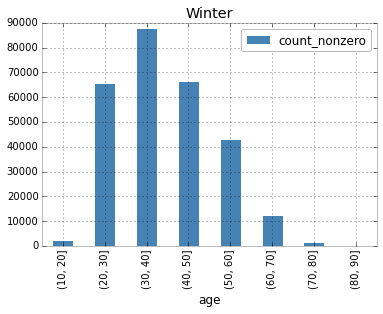

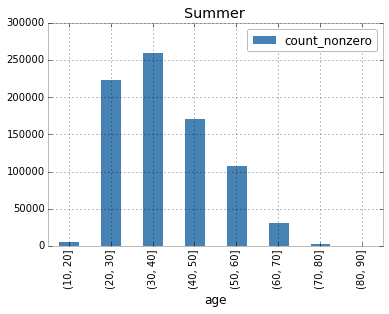

In [24]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

how do they look? what should I expect? setting some expectation is useful as a sanity check!

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [25]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999637418970078, 0.0)
summer, normal fit (0.9999987788873137, 0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [26]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [27]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [28]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (319324425.0, nan)
summer, normal fit (107543975.0, nan)


### TO DO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

In [40]:
### winter data
Dec = pd.read_csv('201412-citibike-tripdata.csv')
Dec['age'] = 2015-Dec['birth year'][(Dec['usertype'] == 'Subscriber')]
Jan = pd.read_csv('201501-citibike-tripdata.csv')
Jan['age'] = 2015-Jan['birth year'][(Jan['usertype'] == 'Subscriber')]
Feb = pd.read_csv('201502-citibike-tripdata.csv')
Feb['age'] = 2015-Feb['birth year'][(Feb['usertype'] == 'Subscriber')]

### summer data
Jun = pd.read_csv('201506-citibike-tripdata.csv')
Jun['age'] = 2015-Jun['birth year'][(Jun['usertype'] == 'Subscriber')]
Jul = pd.read_csv('201507-citibike-tripdata.csv')
Jul['age'] = 2015-Jul['birth year'][(Jul['usertype'] == 'Subscriber')]
Aug = pd.read_csv('201508-citibike-tripdata.csv')
Aug['age'] = 2015-Aug['birth year'][(Aug['usertype'] == 'Subscriber')]

In [41]:
df_Winter = pd.concat([Dec,Jan,Feb], axis=0)
df_Summer = pd.concat([Jun,Jul,Aug], axis=0)

In [43]:
df_All = pd.concat([df_Winter,df_Summer], axis=0)

In [44]:
df_All.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0,NaN
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988,2,27
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983,1,32
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0,NaN
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986,2,29


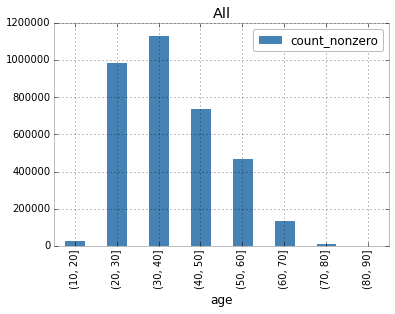

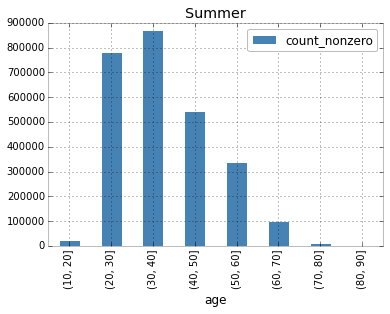

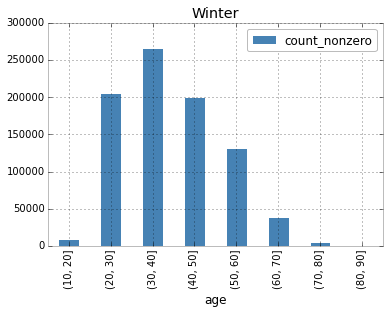

In [46]:
bins = np.arange(10, 99, 10)
# for all riders
df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All")
All_age_dist = df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero])

# for summer riders
df_Summer.age.groupby(pd.cut(df_Summer.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

# for winter riders
df_Winter.age.groupby(pd.cut(df_Winter.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])